Downloading: 100%|██████████| 301889/301889 [00:07<00:00, 37929.89rows/s]


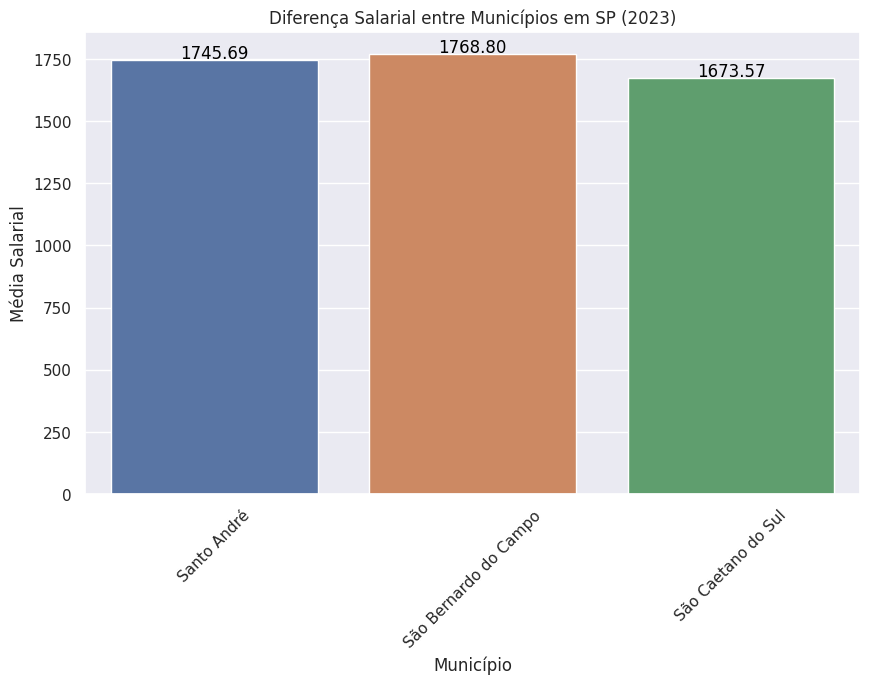

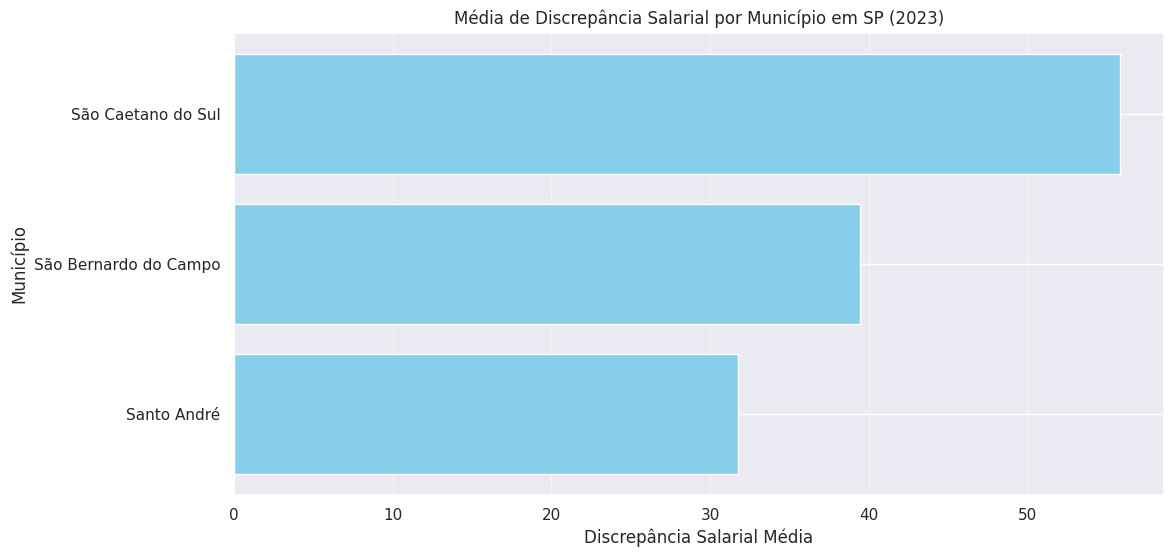

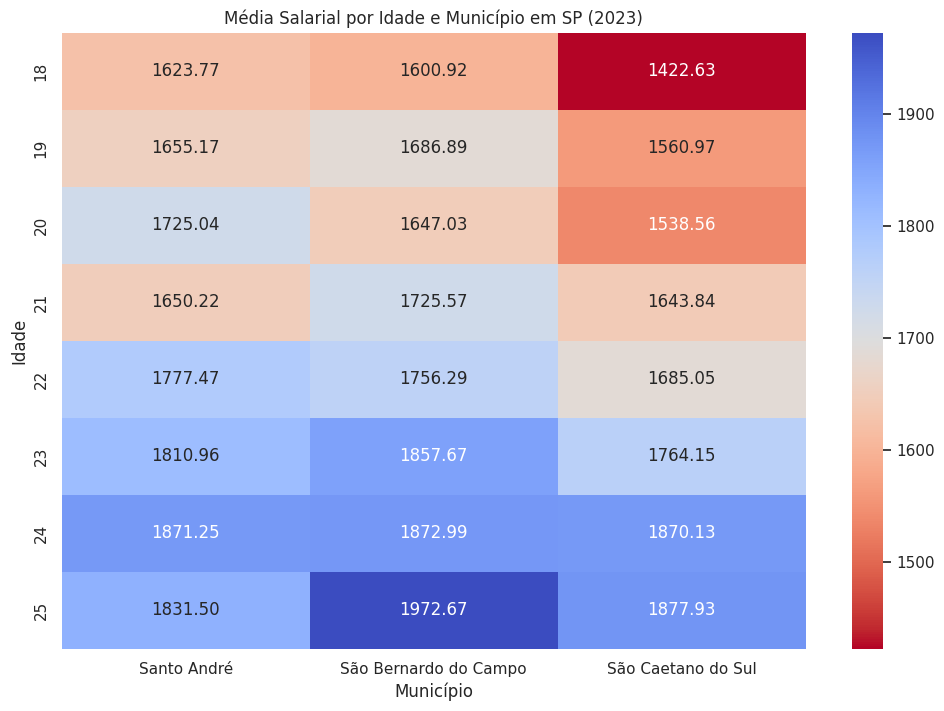

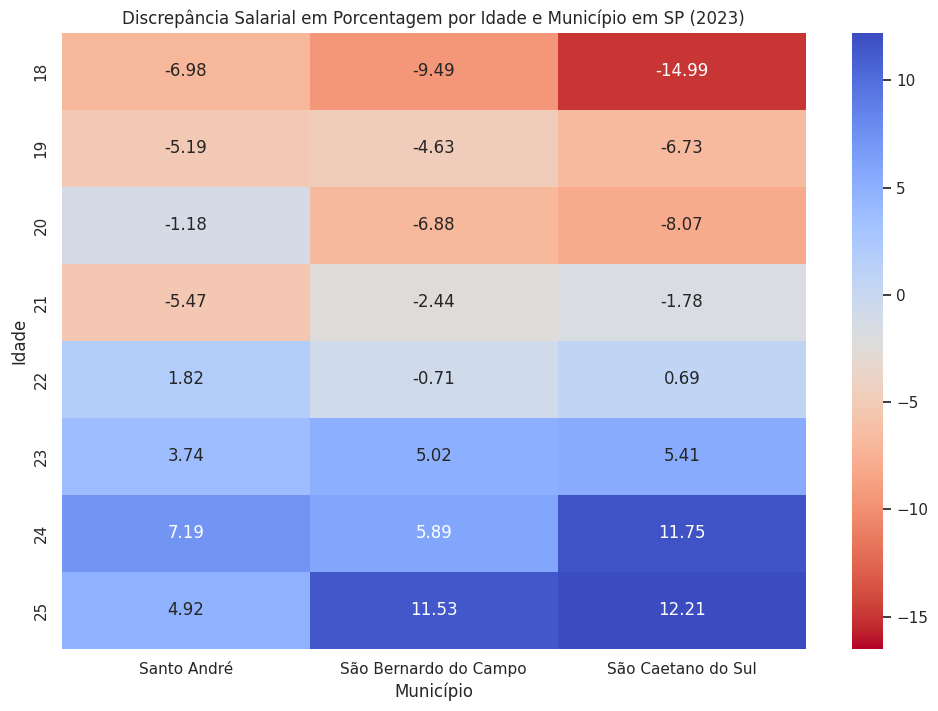

In [ ]:

#!pip install basedosdados
# Importando as bibliotecas necessárias
import basedosdados as bd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Consulta SQL para obter os dados
query = """
SELECT id_municipio, salario_mensal, idade
FROM `basedosdados.br_me_caged.microdados_movimentacao`
WHERE ano >= 2022 AND sigla_uf = 'SP' AND id_municipio IN ('3548807', '3547809', '3548708') AND idade >= 18 and idade <= 25
"""

# Leitura dos dados
df = bd.read_sql(query, billing_project_id="mauajob-datas")

# Calcular a média salarial por município
media_salarial_por_municipio = df.groupby('id_municipio')['salario_mensal'].mean().reset_index()

# Mapear os códigos dos municípios para seus nomes (opcional)
nomes_municipios = {
    '3548807': 'São Caetano do Sul',
    '3547809': 'Santo André',
    '3548708': 'São Bernardo do Campo'
}
media_salarial_por_municipio['municipio'] = media_salarial_por_municipio['id_municipio'].map(nomes_municipios)


# Criar um gráfico de barras para exibir a diferença salarial
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='municipio', y='salario_mensal', data=media_salarial_por_municipio)
plt.xlabel('Município')
plt.ylabel('Média Salarial')
plt.title('Diferença Salarial entre Municípios em SP (2023)')
plt.xticks(rotation=45)

# Adicionar rótulos de média salarial no topo das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

df['municipio'] = df['id_municipio'].map(nomes_municipios)
# Criar subplots para cada município
municipios = df['municipio'].unique()

# Criar uma matriz de diferenças salariais entre os municípios
municipios = media_salarial_por_municipio['municipio'].tolist()
num_municipios = len(municipios)

discrepancia_salarial = np.zeros((num_municipios, num_municipios))

for i in range(num_municipios):
    for j in range(i+1, num_municipios):
        salario_municipio_i = media_salarial_por_municipio.loc[i, 'salario_mensal']
        salario_municipio_j = media_salarial_por_municipio.loc[j, 'salario_mensal']
        discrepancia_salarial[i, j] = abs(salario_municipio_i - salario_municipio_j)
        discrepancia_salarial[j, i] = discrepancia_salarial[i, j]

# Calcular a média de discrepância salarial para cada município
media_discrepancia_municipios = np.mean(discrepancia_salarial, axis=1)

# Criar um gráfico de barras empilhadas
plt.figure(figsize=(12, 6))
plt.barh(municipios, media_discrepancia_municipios, color='skyblue')
plt.xlabel('Discrepância Salarial Média')
plt.ylabel('Município')
plt.title('Média de Discrepância Salarial por Município em SP (2023)')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

# Criar uma matriz de diferenças salariais entre idades e municípios
idades = df['idade'].unique()
num_idades = len(idades)

discrepancia_salarial_idade_municipio = np.zeros((num_idades, num_municipios))

for i in range(num_idades):
    for j in range(num_municipios):
        salario_idade_i_municipio_j = df[(df['idade'] == idades[i]) & (df['municipio'] == municipios[j])]['salario_mensal'].mean()
        discrepancia_salarial_idade_municipio[i, j] = salario_idade_i_municipio_j

# Criar um mapa de calor para visualizar a discrepância salarial
plt.figure(figsize=(12, 8))
sns.heatmap(discrepancia_salarial_idade_municipio, cmap='coolwarm_r', annot=True, fmt=".2f", cbar=True, xticklabels=municipios, yticklabels=idades, vmin=discrepancia_salarial_idade_municipio.min(), vmax=discrepancia_salarial_idade_municipio.max())
plt.xlabel('Município')
plt.ylabel('Idade')
plt.title('Média Salarial por Idade e Município em SP (2023)')
plt.show()

# Criar uma matriz de diferenças percentuais salariais entre idades e municípios
discrepancia_percentual_idade_municipio = np.zeros((num_idades, num_municipios))

for i in range(num_idades):
    for j in range(num_municipios):
        salario_idade_i_municipio_j = df[(df['idade'] == idades[i]) & (df['municipio'] == municipios[j])]['salario_mensal'].mean()
        salario_medio_municipio_j = media_salarial_por_municipio[media_salarial_por_municipio['municipio'] == municipios[j]]['salario_mensal'].values[0]

        discrepancia_percentual = ((salario_idade_i_municipio_j - salario_medio_municipio_j) / salario_medio_municipio_j) * 100
        discrepancia_percentual_idade_municipio[i, j] = discrepancia_percentual

# Criar um mapa de calor para visualizar a discrepância salarial em porcentagem
plt.figure(figsize=(12, 8))
sns.heatmap(discrepancia_percentual_idade_municipio, cmap='coolwarm_r', annot=True, fmt=".2f", cbar=True, xticklabels=municipios, yticklabels=idades, vmin=discrepancia_percentual_idade_municipio.max(), vmax=discrepancia_percentual_idade_municipio.min())
plt.xlabel('Município')
plt.ylabel('Idade')
plt.title('Discrepância Salarial em Porcentagem por Idade e Município em SP (2023)')
plt.show()



